In [2]:
!pip install import-ipynb

In [3]:
import import_ipynb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle
import util

importing Jupyter notebook from util.ipynb
Requirement already up-to-date: scikit-learn in /home/jakub/.local/lib/python3.8/site-packages (1.3.0)


In [7]:
class ANN:
    def __init__(self, M1, M2):
        self.M1 = M1
        self.M2 = M2
        
    def fit(self, X, Y):
        X, Y = shuffle(X, Y)
        Xtrain = X[:-1000]
        Ytrain = Y[:-1000]
        Xvalid = X[-1000:]
        Yvalid = Y[-1000:]
        
        T = util.y2indicator(Ytrain)
        
        Tvalid = util.y2indicator(Yvalid)
        
        N, D = X.shape
        K = len(set(Ytrain) | set(Yvalid))
        print(K)
        
        self.W1 = np.random.randn(D, self.M1) / np.sqrt(D + self.M1)
        self.b1 = np.zeros(self.M1)
        self.W2 = np.random.randn(self.M1, self.M2) / np.sqrt(self.M1 + self.M2)
        self.b2 = np.zeros(self.M2)
        self.W3 = np.random.randn(self.M2, K) / np.sqrt(self.M2 + K)
        self.b3 = np.zeros(K)
        
        epochs = 501
        learning_rate = 3e-7
        reg = 1e-6
        costs = []
        best_validation_error = 1
        
        for i in range(epochs):
            pY, Z1, Z2 = self.forward(Xtrain)
            
            pY_T = pY - T
            self.W3 -= learning_rate*(Z2.T.dot(pY_T) + reg*self.W3)
            self.b3 -= learning_rate*(pY_T.sum(axis=0) + reg*self.b3)
            
            dZ2 = (pY_T).dot(self.W3.T)*(Z2 > 0)
            
            self.W2 -= learning_rate*(Z1.T.dot(dZ2) + reg*self.W2)
            self.b2 -= learning_rate*(dZ2.sum(axis=0) + reg*self.b2)
            
            dZ1 = dZ2.dot(self.W2.T)*(Z1 > 0)
            
            self.W1 -= learning_rate*(Xtrain.T.dot(dZ1) + reg*self.W1)
            self.b1 -= learning_rate*(dZ1.sum(axis=0) + reg*self.b1)
            
            if i%20 == 0:
                pYvalid, _, _ = self.forward(Xvalid)
#                 pYvalid = pYvalid[0]
                pYvalid = np.array(pYvalid)
                c = util.cost(Tvalid, pYvalid)
                costs.append(c)
                e = util.error_rate(Yvalid, np.argmax(pYvalid, axis=1))
                if e < best_validation_error:
                    best_validation_error = e
                print(f'c:{c}, e: {e}, i: {i}')
                
        print(f'c:{c}, best validation error: {best_validation_error}, i: {i}')
        plt.plot(costs)
        plt.show()
        print(self.W1, self.b1, self.W2, self.b2)

            
    def forward(self, X):
        Z1 = util.relu(X.dot(self.W1) + self.b1)
        Z2 = util.relu(Z1.dot(self.W2) + self.b2)
        return util.softmax(Z2.dot(self.W3) + self.b3), Z1, Z2
    
    

def main():
    X, Y, _, _ = util.get_data()
    ann = ANN(300, 300)
    ann.fit(X, Y)
    

(34350,)
(34350, 2304)
7
c:1918.6631151683453, e: 0.871, i: 0
c:1807.280626813863, e: 0.734, i: 20
c:1794.4751038410295, e: 0.733, i: 40
c:1787.7798499537225, e: 0.733, i: 60
c:1783.1107452309611, e: 0.733, i: 80
c:1779.168795859769, e: 0.732, i: 100
c:1775.577352003234, e: 0.731, i: 120
c:1772.3480571956538, e: 0.731, i: 140
c:1769.3819959728214, e: 0.732, i: 160
c:1766.5405826454794, e: 0.736, i: 180
c:1763.921234212152, e: 0.734, i: 200
c:1761.3934498726287, e: 0.733, i: 220
c:1758.9058057927577, e: 0.731, i: 240
c:1756.4626194369948, e: 0.726, i: 260
c:1754.038746133126, e: 0.726, i: 280
c:1751.577978520443, e: 0.727, i: 300
c:1749.1184310057965, e: 0.725, i: 320
c:1746.6334421598249, e: 0.72, i: 340
c:1744.0851833421743, e: 0.719, i: 360
c:1741.505866098526, e: 0.713, i: 380
c:1738.8509089487873, e: 0.708, i: 400
c:1736.138978201503, e: 0.708, i: 420
c:1733.3485443923746, e: 0.702, i: 440
c:1730.448433983181, e: 0.693, i: 460
c:1727.4759500375526, e: 0.682, i: 480
c:1724.562120710

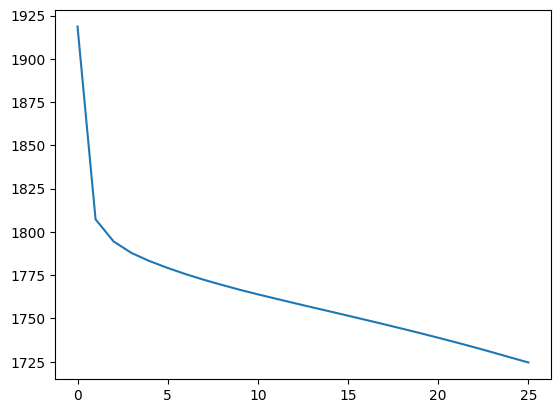

[[-0.04889992  0.01692184  0.00312646 ...  0.01636124 -0.00981394
  -0.03075365]
 [ 0.01058465  0.01192113  0.00588501 ... -0.05911548 -0.0082666
  -0.02013947]
 [-0.02934141  0.00675157 -0.05082056 ...  0.01359368 -0.00286964
   0.01226464]
 ...
 [-0.01618467  0.00155394 -0.01397384 ... -0.0022219   0.01751513
   0.00351547]
 [ 0.00993688 -0.00658747 -0.02154132 ... -0.032698    0.02419904
   0.00708449]
 [ 0.00909678 -0.00190959  0.01069174 ... -0.0202941   0.01125846
  -0.04919045]] [ 3.59607655e-04  2.37039376e-06  1.64121938e-03 -1.39846424e-04
  8.17462317e-03 -4.68497667e-04 -3.87798997e-04  3.96464791e-04
 -2.12322007e-03  7.41332981e-04  5.61282583e-07 -3.57521686e-04
  2.75610029e-03  1.74151325e-03  1.67803417e-03 -1.37635179e-03
  2.41256349e-05 -5.88769495e-05  6.98803034e-03 -7.27699782e-04
  5.65031186e-03 -1.78086063e-04 -4.44351491e-04  3.36513869e-04
  1.02339096e-04  6.43713763e-05  5.09866109e-03 -6.81467528e-04
  1.85968114e-03  4.08495009e-03 -1.70557513e-04 -4.81

In [8]:
if __name__ == '__main__':
    main()